In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread(r"C:\Users\vadhe\AI Training\Image reco\test images\Ellesyperry_1.jpg")
img.shape

(1274, 1080, 3)

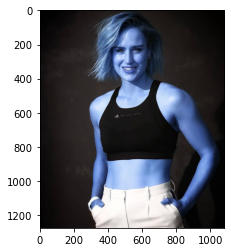

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1274, 1080)

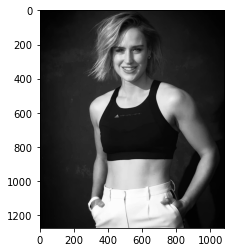

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face = cv2.CascadeClassifier(r"C:\Users\vadhe\AI Training\Image reco\Opencv_harcascade\haarcascade_frontalface_default.xml")
eye = cv2.CascadeClassifier(r"C:\Users\vadhe\AI Training\Image reco\Opencv_harcascade\haarcascade_eye.xml")

faces = face.detectMultiScale(gray, 1.3, 5)
faces

array([[394, 137, 259, 259]])

In [7]:
(x, y, w, h) = faces[0]
x,y,w,h

(394, 137, 259, 259)

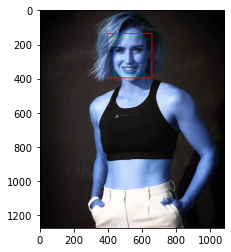

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(face_img)

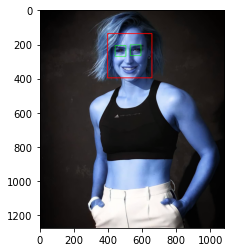

In [9]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

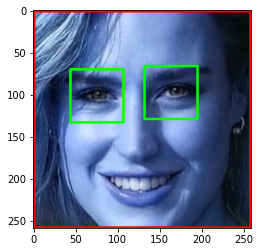

In [10]:
plt.imshow(roi_color, cmap='gray')

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read the image at {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

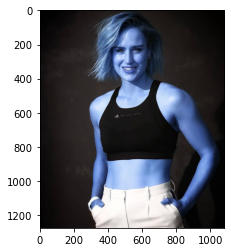

In [12]:
original_image = cv2.imread(r"C:\Users\vadhe\AI Training\Image reco\test images\Ellesyperry_1.jpg")
plt.imshow(original_image)

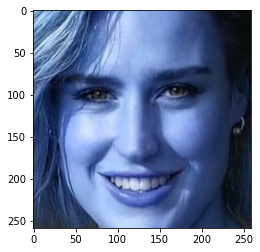

In [13]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\Users\vadhe\AI Training\Image reco\test images\Ellesyperry_1.jpg")
plt.imshow(cropped_image)

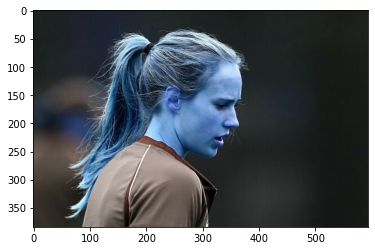

In [14]:
org_image_obstructed = cv2.imread(r"C:\Users\vadhe\AI Training\Image reco\test images\test_2.jpg")
plt.imshow(org_image_obstructed)

In [15]:
import numpy as np
import pywt
import cv2

def decomposing(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;
    
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

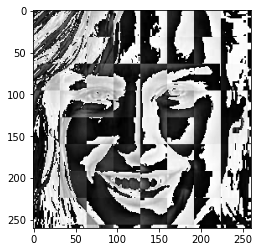

In [16]:
img_har = decomposing(cropped_image, 'db1', 5)
plt.imshow(img_har, cmap='gray')

In [17]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r"C:\Users\vadhe\AI Training\Image reco\test images\test_2.jpg")
cropped_image_no_2_eyes

In [18]:
path_to_data = "./dataset"
path_to_cr_data = "./dataset/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset\\Ellesy_Perry',
 './dataset\\Lional_Massi',
 './dataset\\Maria_Sarapova',
 './dataset\\Rojer_Feder',
 './dataset\\Sarena_Williams',
 './dataset\\Virat_Kohli']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
             
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

Ellesy_Perry
Error: Unable to read the image at ./dataset\Ellesy_Perry\1200px-2017–18_W_Ashes_A_v_E_Test_17-11-10_Perry_portrait_(02) (1).jpg
Error: Unable to read the image at ./dataset\Ellesy_Perry\1200px-2017–18_W_Ashes_A_v_E_Test_17-11-10_Perry_portrait_(02).jpg
Generating cropped images in folder:  ./dataset/cropped/Ellesy_Perry
Lional_Massi
Generating cropped images in folder:  ./dataset/cropped/Lional_Massi
Maria_Sarapova
Error: Unable to read the image at ./dataset\Maria_Sarapova\.jpg
Generating cropped images in folder:  ./dataset/cropped/Maria_Sarapova
Rojer_Feder
Generating cropped images in folder:  ./dataset/cropped/Rojer_Feder
Sarena_Williams
Generating cropped images in folder:  ./dataset/cropped/Sarena_Williams
Virat_Kohli
Generating cropped images in folder:  ./dataset/cropped/Virat_Kohli
Error: Unable to read the image at ./dataset\Virat_Kohli\1678836965_57c7769197215ff88fbbb4b52c34856d.gif


In [23]:
celebrity_fle_nmes_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Ellesy_Perry': ['./dataset/cropped/Ellesy_Perry\\Ellesy_Perry1.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry10.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry11.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry12.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry13.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry14.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry15.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry16.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry17.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry18.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry19.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry2.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry20.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry21.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry22.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry23.png',
  './dataset/cropped/Ellesy_Perry\\Ellesy_Perry24.png',
  './dataset/cropped/Ellesy_Perry\

In [24]:
class_dict = {}
count =0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Ellesy_Perry': 0,
 'Lional_Massi': 1,
 'Maria_Sarapova': 2,
 'Rojer_Feder': 3,
 'Sarena_Williams': 4,
 'Virat_Kohli': 5}

In [25]:
X, y = [], []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        # Attempt to read the image
        img = cv2.imread(training_image)

        # Check if the image reading was successful
        if img is not None:
            # Resize the raw image
            scalled_raw_img = cv2.resize(img, (32, 32))

            # Decompose the image using your decomposing function (assuming it's defined)
            img_har = decomposing(img, 'db1', 5)

            # Resize the decomposed image
            scalled_img_har = cv2.resize(img_har, (32, 32))

            # Stack the resized raw and decomposed images vertically
            combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))

            # Append to X and y
            X.append(combined_img)
            y.append(class_dict[celebrity_name])
        else:
            print(f"Error reading image: {training_image}")

#Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)


In [26]:
len(X[0])

4096

In [27]:
X[0]

array([[246],
       [245],
       [247],
       ...,
       [ 33],
       [ 43],
       [110]], dtype=uint8)

In [28]:
y[0]

0

In [29]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(233, 4096)

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=30)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5428571428571428

In [39]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.43      0.90      0.58        20
           1       0.69      0.56      0.62        16
           2       0.50      0.29      0.36        14
           3       1.00      0.14      0.25         7
           4       1.00      0.17      0.29         6
           5       1.00      0.71      0.83         7

    accuracy                           0.54        70
   macro avg       0.77      0.46      0.49        70
weighted avg       0.67      0.54      0.51        70



In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [35]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.689748,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.523866,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.712437,{'logisticregression__C': 1}


In [41]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [42]:
best_estimators['svm'].score(X_test, y_test)

0.8714285714285714

In [44]:
best_estimators['random_forest'].score(X_test, y_test)

0.8428571428571429

In [45]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.9

In [46]:
best_clf = best_estimators['svm']

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[20,  0,  0,  0,  0,  0],
       [ 2, 14,  0,  0,  0,  0],
       [ 3,  1, 10,  0,  0,  0],
       [ 2,  1,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

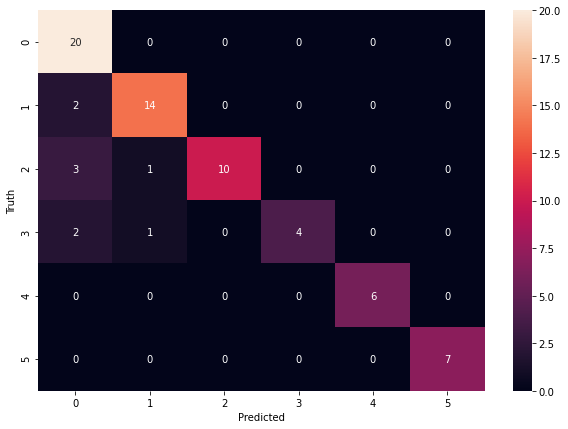

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
class_dict

{'Ellesy_Perry': 0,
 'Lional_Massi': 1,
 'Maria_Sarapova': 2,
 'Rojer_Feder': 3,
 'Sarena_Williams': 4,
 'Virat_Kohli': 5}

In [52]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [53]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))